In [1]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
import csv
import ast
import sys

In [10]:
boltzmann_const = constants.Boltzmann

In [126]:
data = []
with open('en_5_new.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in reader:
        for element in row:
            data.append(ast.literal_eval(element.strip()))

In [127]:
pos = []
csv.field_size_limit(sys.maxsize)
with open('chk_5_new.txt') as checkpoint_file:
    reader = csv.reader(checkpoint_file, delimiter=',', quotechar='"')
    for row in reader:
        for element in row:
            pos.append(ast.literal_eval(element.strip()))

In [135]:
len(pos[-1])

300

In [136]:
len(data)

918000

In [140]:
def compute_Z(energies, K, beta):
    '''
    Function to estimate partition function from energ list

    @param energies : energy list
    @param K : number of live points
    @paramm beta : beta factor
    @return Z : partition function estimate
    '''
    
    # Iterate over energies
    Z = 0
    scale = K/(K+1)
    for n in range(int(len(energies)/2)):

        # Compute
        Z += ((scale ** (n+1)) - (scale ** (n+2))) * np.exp(- beta * energies[2*n])

    # Return
    return Z

def C_v(beta, N, energies, K):
    '''
    Function to compute constant volume heat capacity

    @param beta : beta factor (k_b*T)
    @param energies : energy list
    @param K : number of live points
    @param N : number of particles
    '''

    # Compute factors
    term1 = 0
    term2 = 0
    Z = compute_Z(energies, K, beta)
    scale = K/(K+1)

    # Iterate over 
    for n in range(int(len(energies)/2)):

        # Add to Cv
        w_n = (scale ** (n+1)) - (scale ** (n+2))
        term1 += (w_n * energies[2*n] * np.exp(-beta * energies[2*n]) * (beta**2) * boltzmann_const) * (w_n * energies[2*n] * np.exp(-beta * energies[2*n]))
        term2 += (w_n * (energies[2*n] ** 2) * np.exp(-beta * energies[2*n]) * (beta**2) * boltzmann_const)

    # Post summation
    Cv = (3*N*boltzmann_const)/2 - (term1/(Z**2)) + (term2/Z)

    # Return 
    return Cv

def U(beta, N, energies, K):
    '''
    Function to compute constant volume heat capacity

    @param beta : beta factor (k_b*T)
    @param energies : energy list
    @param K : number of live points
    @param N : number of particles
    '''

    # Compute factors
    term1 = 0
    Z = compute_Z(energies, K, beta)
    scale = K/(K+1)

    # Iterate over 
    for n in range(len(energies)):

        # Add to Cv
        w_n = (scale ** (n+1)) - (scale ** (n+2))
        term1 += (w_n * energies[n][1] * np.exp(-beta * energies[n][1]))

    # Post summation
    U = (3*N)/(2*beta) - (term1/Z)

    # Return 
    return U

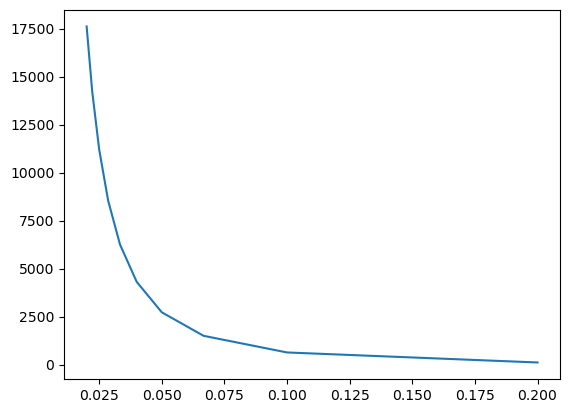

In [143]:
x = np.linspace(0.2, 5, 10)
cv = [C_v(beta, 5, data, K)/(5*boltzmann_const) for beta in x]
plt.plot(1/(x*10), cv)